In [7]:
#task1
import csv
import pandas as pd #data processing

filename = "train.csv"
data = pd.read_csv(filename)
datas=pd.DataFrame(data.iloc[:,0:])
datas.columns=list(data.iloc[:,0:].columns)
datas['class']=data['class']
data_drop=datas.drop('class',axis=1)
X=datas.drop('class',axis=1)
Y=datas['class']#.map({'M':1,'B':0})

print('Size of the dataframe: {}'.format(datas.shape))

Size of the dataframe: (6391, 298)


In [3]:
%matplotlib inline

In [8]:
datas.head()

,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297
0,0,-1,-1.0,-1,-1,1,-1.00,600,-1,-1,-1,-1,-1,-1.0,-1.0,-1,1,1,-1,1098.0,-1.0,-1,-1.0,-1,2,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,8.0,1,1,-1,-1,2,...,-1,-1,28,-1,-1,104.0,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,305.50,1,-1,-1.0,-1,-1,-1,200,1,-1,-1,-1,-1,-1,-1.0,-1,40.0,24.0
1,0,-1,-1.0,1,-1,-1,-1.00,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1,-1.0,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,...,-1,-1,24,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.00,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0
2,0,-1,-1.0,1,-1,-1,0.02,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1,-1.0,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,...,-1,-1,23,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,306.00,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0
3,0,-1,0.0,-1,-1,-1,-1.00,-1,-1,-1,-1,-1,-1,-1.0,7.0,1,-1,-1,-1,-1.0,-1.0,-1,-1.0,-1,-1,-1,-1,-1,-1,-1.0,-1,1,-1,-1,-1.0,-1,-1,-1,-1,-1,...,-1,-1,72,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.00,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0
4,0,-1,-1.0,-1,-1,-1,-1.00,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1,-1.0,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,1.0,-1,-1,-1,-1,-1,...,-1,-1,8,-1,-1,1142.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,274.08,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0


In [9]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297
0,-1,-1.0,-1,-1,1,-1.00,600,-1,-1,-1,-1,-1,-1.0,-1.0,-1,1,1,-1,1098.0,-1.0,-1,-1.0,-1,2,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,8.0,1,1,-1,-1,2,-1,...,-1,-1,28,-1,-1,104.0,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,305.50,1,-1,-1.0,-1,-1,-1,200,1,-1,-1,-1,-1,-1,-1.0,-1,40.0,24.0
1,-1,-1.0,1,-1,-1,-1.00,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1,-1.0,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,...,-1,-1,24,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.00,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0
2,-1,-1.0,1,-1,-1,0.02,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1,-1.0,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,...,-1,-1,23,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,306.00,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0
3,-1,0.0,-1,-1,-1,-1.00,-1,-1,-1,-1,-1,-1,-1.0,7.0,1,-1,-1,-1,-1.0,-1.0,-1,-1.0,-1,-1,-1,-1,-1,-1,-1.0,-1,1,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,...,-1,-1,72,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.00,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0
4,-1,-1.0,-1,-1,-1,-1.00,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1,-1.0,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,1.0,-1,-1,-1,-1,-1,-1,...,-1,-1,8,-1,-1,1142.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,274.08,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0


In [6]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [1]:
#task2: 별도로 첨부된 파이썬 코드에 있습니다.


In [10]:
#task3
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential, Model
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from itertools import product

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=0)


###SVC
clf = Sequential()
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
score = accuracy_score(y_test, predict)
print('svm prediction score: %s' % score)


###k-means
kmeans = KMeans(n_clusters=2).fit(x_train,y_train)
predict = kmeans.predict(x_test)
score = accuracy_score(y_test,predict)

print('k-means prediction score: %s' % score)


###dbscan
samp_list=[2,3,4]
eps_list=[0.8,1.0,1.25,1.5,1.75]

for k, (eps,samp) in enumerate(product(eps_list,samp_list)):
  dbscan = DBSCAN(eps=eps,min_samples=samp).fit(x_train,y_train)
  predict = dbscan.fit_predict(x_test)
  score = accuracy_score(y_test,predict)


svm prediction score: 0.9125
k-means prediction score: 0.625


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


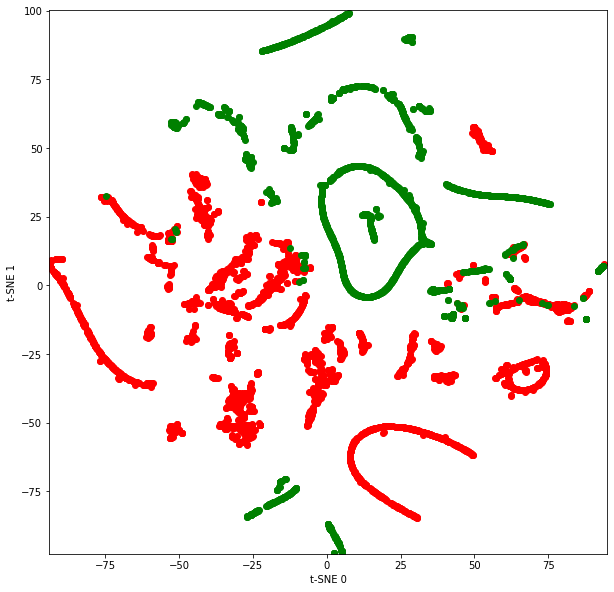

'\n###train\nx_array = x_train.to_numpy()\ny_array = y_train.to_numpy()\n\ndata_array = datas.to_numpy()\n# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.\ntsne_data = tsne.fit_transform(x_array)\n#predict = tsne_data.fit_predict(x_test)\n#score=accuracy_score(y_test,predict)\n#print(score)\nTSNE_components_train = pd.DataFrame(tsne_data)\n\nplt.figure(figsize=(10,10))\nplt.xlim(tsne_data[:,0].min(), tsne_data[:,0].max()+1)\nplt.ylim(tsne_data[:,1].min(), tsne_data[:,1].max()+1)\n\ncolors = \'r\', \'g\'\nlabels= \'benign\',\'malicious\'\n\nfor i in range(len(tsne_data)):\n  plt.scatter(tsne_data[i,0], tsne_data[i,1], c = colors[y_array[i]], label=labels[y_array[i]])\n\n#for data,color,label in zip(tsne_data,colors,labels):\n#  plt.scatter(data[0], data[1], c = color, label=label)\n    \nplt.xlabel("t-SNE 0")\nplt.ylabel("t-SNE 1")\n\n#plt.legend()\nplt.show() \n\n\n###test\nx_array = x_test.to_numpy()\ny_array = y_test.to_numpy()\n\ndata_array = datas.to_numpy()\n# TSNE에는 transform

In [84]:
#task4
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

tsne = TSNE(n_components=2, perplexity=30,random_state = 10)

x_array = X.to_numpy()
y_array = Y.to_numpy()

data_array = datas.to_numpy()
tsne_data = tsne.fit_transform(x_array)
TSNE_components = pd.DataFrame(tsne_data)

plt.figure(figsize=(10,10))
plt.xlim(tsne_data[:,0].min(), tsne_data[:,0].max()+1)
plt.ylim(tsne_data[:,1].min(), tsne_data[:,1].max()+1)

colors = 'r', 'g'
labels= 'benign','malicious'

for i in range(len(tsne_data)):
  plt.scatter(tsne_data[i,0], tsne_data[i,1], c = colors[y_array[i]], label=labels[y_array[i]])

    
plt.xlabel("t-SNE 0")
plt.ylabel("t-SNE 1")

plt.show() 

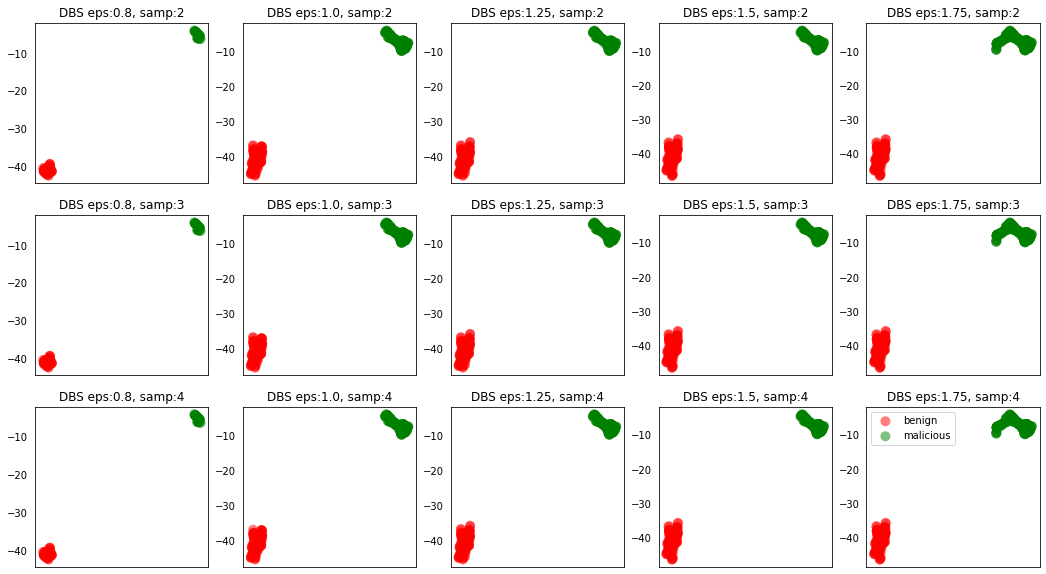

dbscan prediction score: 0.003125


'\n###train\nfor k, (eps,samp) in enumerate(product(eps_list,samp_list)):\n  ax[k%rows][math.floor(k/rows)].tick_params(axis=\'both\',which=\'both\',bottom=False,top=False,left=False,labelbottom=False)\n\n  TSNE_df = TSNE_components_train.copy()\n  clustering = DBSCAN(eps=eps,min_samples=samp).fit(TSNE_df)\n  TSNE_df.insert(0,\'cluster\',clustering.labels_)\n  #TSNE_df=np.insert(TSNE_df,0,clustering.labels_,axis=1)\n\n  datas=[[TSNE_df[TSNE_df[\'cluster\']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]\n  \n  colors=(\'r\',\'g\')\n  #groups = [str(i) for i in range(len(set(clustering.labels_)))]\n  groups = (\'benign\',\'malicious\')\n\n  for data,color,group in zip(datas,colors,groups):\n    ax[k%rows][math.floor(k/rows)].scatter(data[0],data[1],alpha=0.5,c=color,edgecolors=\'none\',s=100,label=group)\n    ax[k%rows][math.floor(k/rows)].set_title(f\'DBS eps:{eps}, samp:{samp}\')\n\n    \n#plt.xlabel("t-SNE 0")\n#plt.ylabel("t-SNE 1")\n\nplt.legend()\nplt.show(

In [87]:
#dbscan
from sklearn.cluster import DBSCAN
from itertools import product
import math

samp_list=[2,3,4]
eps_list=[0.8,1.0,1.25,1.5,1.75]
rows = len(samp_list)

fig,ax = plt.subplots(len(samp_list),len(eps_list),figsize=(18,10))

for k, (eps,samp) in enumerate(product(eps_list,samp_list)):
  ax[k%rows][math.floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False)

  TSNE_df = TSNE_components.copy()
  clustering = DBSCAN(eps=eps,min_samples=samp).fit(TSNE_df)
  TSNE_df.insert(0,'cluster',clustering.labels_)

  datas=[[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
  
  colors=('r','g')
  groups = ('benign','malicious')

  for data,color,group in zip(datas,colors,groups):
    ax[k%rows][math.floor(k/rows)].scatter(data[0],data[1],alpha=0.5,c=color,edgecolors='none',s=100,label=group)
    ax[k%rows][math.floor(k/rows)].set_title(f'DBS eps:{eps}, samp:{samp}')

plt.legend()
plt.show() 

predict = dbscan.fit_predict(x_test)
score = accuracy_score(y_test,predict)

print('dbscan prediction score: %s' % score)

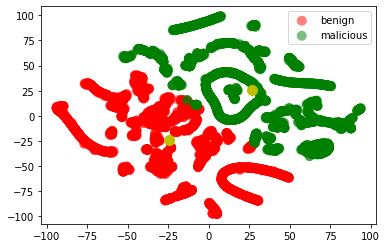

'\n###train\nTSNE_df = TSNE_components_train.copy()\n#kmeans = KMeans(n_clusters=2, max_iter=300, n_init=10, random_state=0)\nkmeans = KMeans(n_clusters=2).fit(TSNE_df)\n\npredict = pd.DataFrame(kmeans.predict(TSNE_df))\npredict.columns=["predict"]\nTSNE_df.insert(0,\'predict\',kmeans.labels_)\n\n#r=pd.concat([X,predict],axis=1)\ndatas=[[TSNE_df[TSNE_df[\'predict\']==i][j] for j in range(2)] for i in range(len(set(kmeans.labels_)))]\n\ncolors=(\'r\',\'g\')\ngroups = (\'benign\',\'malicious\')\n\nfor data,color,group in zip(datas,colors,groups):\n    plt.scatter(data[0],data[1],alpha=0.5,c=(\'r\' if group=="benign" else \'g\'),edgecolors=\'none\',s=100,label=group)\nplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c=\'y\')\n\nplt.legend()\nplt.show()\n\n\n###test\nTSNE_df = TSNE_components_test.copy()\n#kmeans = KMeans(n_clusters=2, max_iter=300, n_init=10, random_state=0)\nkmeans = KMeans(n_clusters=2).fit(TSNE_df)\n\npredict = pd.DataFrame(kmeans.predic

In [86]:
#t-sne + k-means clustering for output of t-sne data
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans

TSNE_df = TSNE_components.copy()
kmeans = KMeans(n_clusters=2).fit(TSNE_df)

predict = pd.DataFrame(kmeans.predict(TSNE_df))
predict.columns=["predict"]
TSNE_df.insert(0,'predict',kmeans.labels_)

datas=[[TSNE_df[TSNE_df['predict']==i][j] for j in range(2)] for i in range(len(set(kmeans.labels_)))]

colors=('r','g')
groups = ('benign','malicious')

for data,color,group in zip(datas,colors,groups):
    plt.scatter(data[0],data[1],alpha=0.5,c=('r' if group=="benign" else 'g'),edgecolors='none',s=100,label=group)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='y')

plt.legend()
plt.show()